In [23]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# Load the dataset

df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
# checking the dataset size

df.shape

(1338, 7)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [28]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [29]:
# null values in the numerical columns replace with mean or median
# null values in the categorical columns replace with mode

In [30]:
# for the numerical column - null values replacement

# df['age'].fillna(df['age'].median,inplace = True)

# for the categorical column - null values replacement

# df['smoker'].fillna(df['smoker'].mode,inplace =True)



In [31]:
# checking the descriptive statistics

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [32]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [34]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [35]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [36]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [37]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [38]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [39]:
df.children.unique()

array([0, 1, 3, 2, 5, 4])

## Visualization

### Univariate analysis

<ipython-input-40-36725a16e635>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

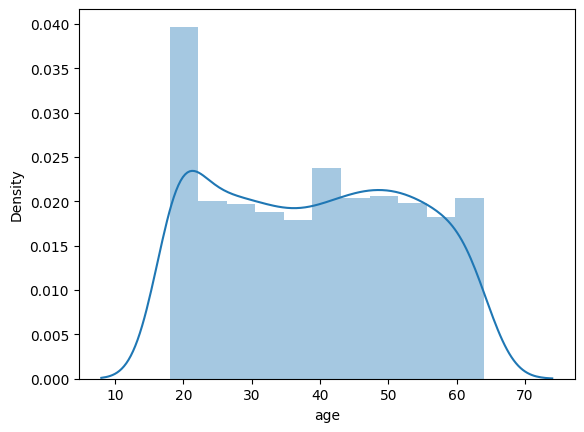

In [40]:
sns.distplot(df.age)

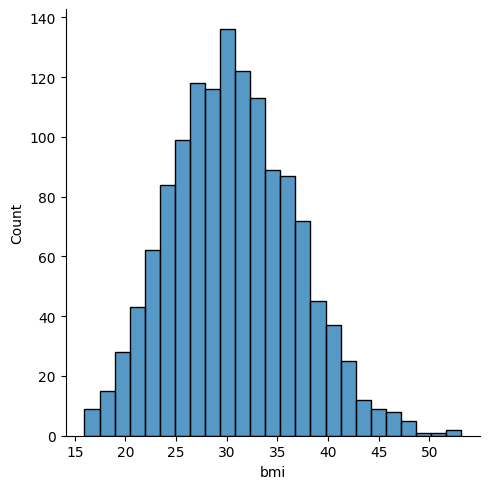

In [41]:
sns.displot(df.bmi)

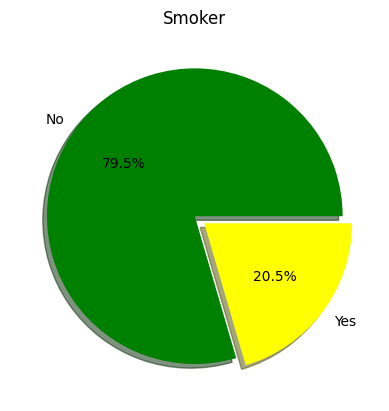

In [42]:
plt.pie(df.smoker.value_counts(),[0,.08],labels = ['No','Yes'],autopct = '%1.1f%%',shadow = True,colors = ['green','yellow'])
plt.title('Smoker')
plt.show()

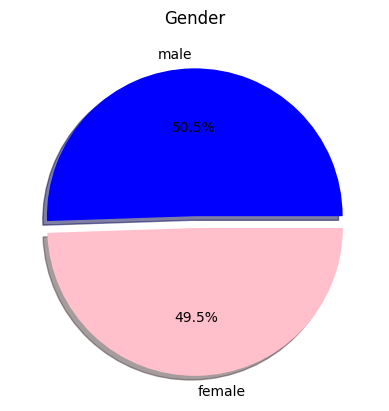

In [43]:
plt.pie(df.sex.value_counts(),[0,.08],labels = ['male','female'],autopct = '%1.1f%%',shadow = True,colors = ['blue','pink'])
plt.title('Gender')
plt.show()

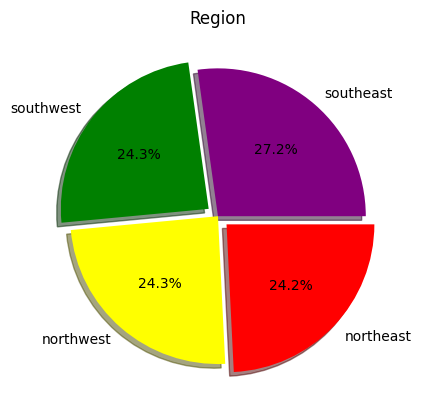

In [44]:
plt.pie(df.region.value_counts(),[0,.08,0,0.08],labels = ['southeast','southwest','northwest','northeast'],autopct = '%1.1f%%',shadow = True,colors = ['purple','green','yellow','red'])
plt.title('Region')
plt.show()

<Axes: xlabel='region', ylabel='count'>

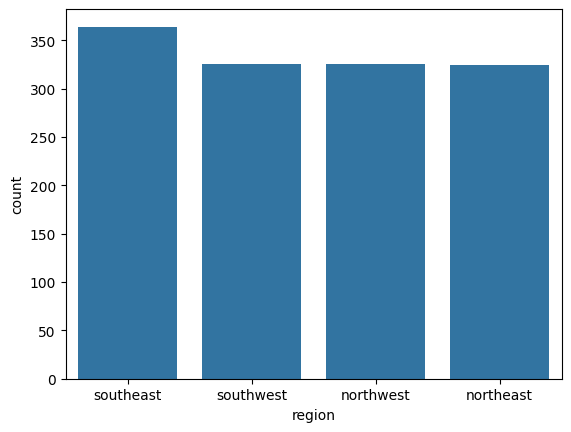

In [45]:
sns.barplot(x=df.region.value_counts().index,y=df.region.value_counts())

### Bivariate Analysis

<Axes: xlabel='age', ylabel='bmi'>

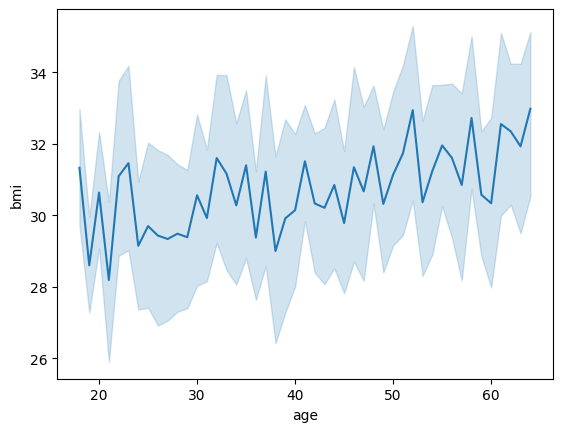

In [46]:
sns.lineplot(x= df.age, y = df.bmi)

<Axes: xlabel='age', ylabel='charges'>

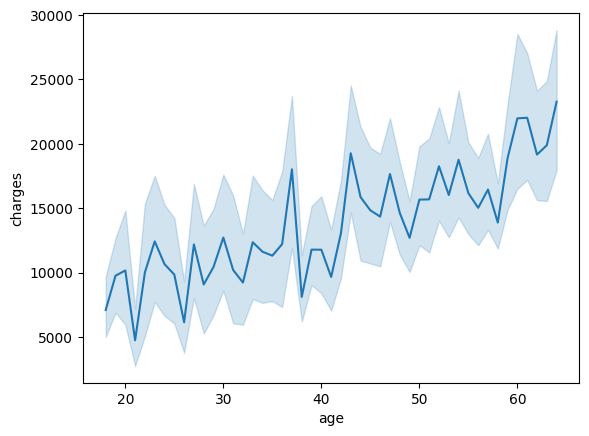

In [47]:
sns.lineplot(x= df.age, y = df.charges)

<Axes: xlabel='age', ylabel='bmi'>

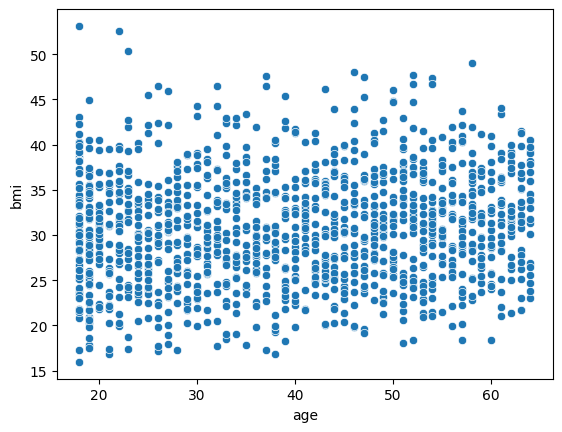

In [48]:
sns.scatterplot(x= df.age, y = df.bmi)

### Multivariate Analysis

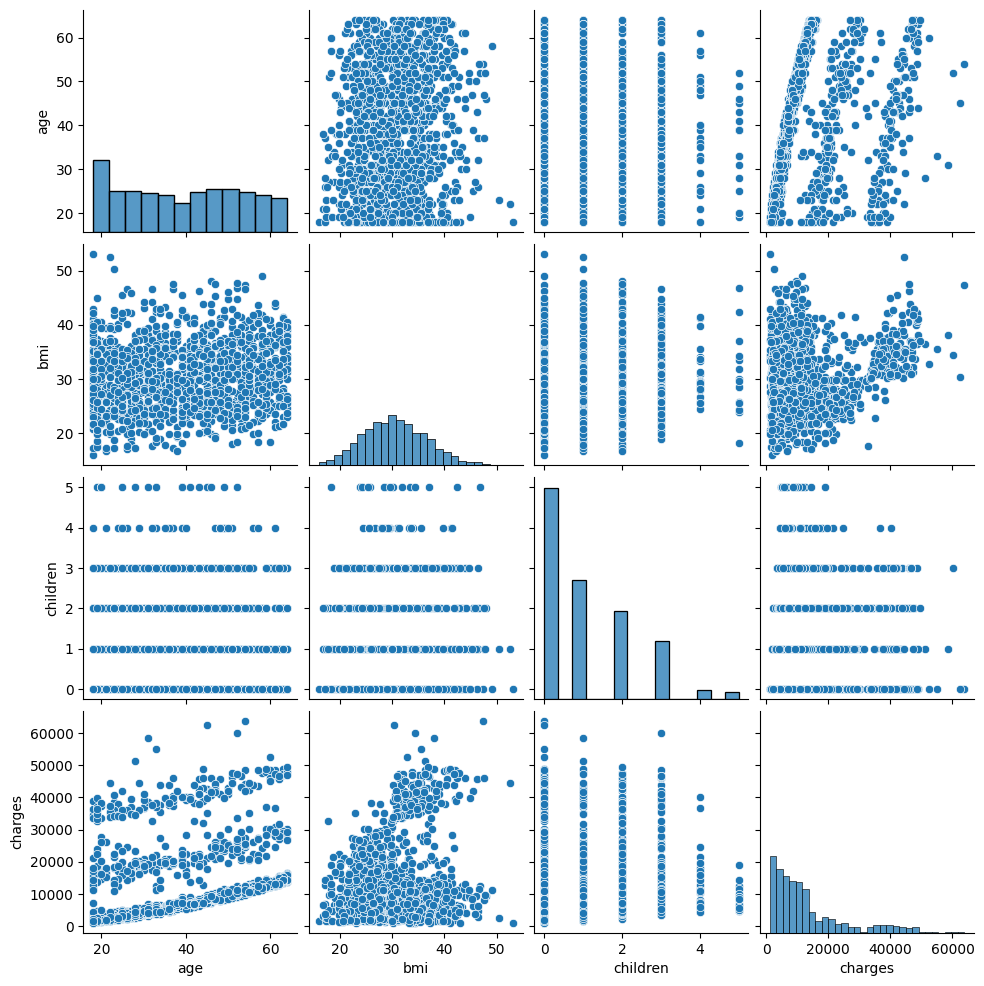

In [49]:
sns.pairplot(df)

### Outlier detection

In [50]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: ylabel='bmi'>

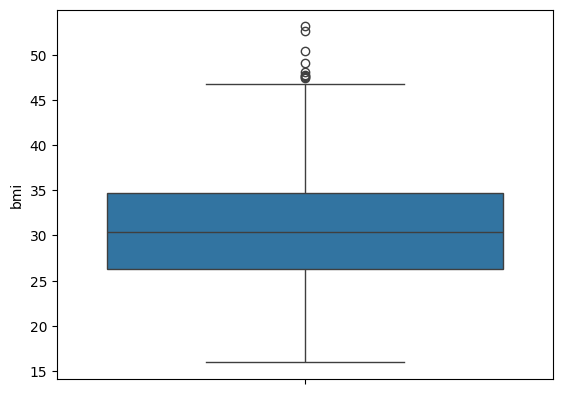

In [51]:
sns.boxplot(df.bmi)

### Outlier Treatment  - Replacing outliers with median

In [52]:
# Upper_limit = q3+1.5*IQR

# Lower_limit = q1-1.5*IQR


In [53]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [54]:
q1 = df.bmi.quantile(0.25)

In [55]:
q1

26.29625

In [56]:
q3 = df.bmi.quantile(0.75)

In [57]:
q3

34.69375

In [58]:
IQR = q3 - q1

In [59]:
IQR

8.3975

In [60]:
Upper_limit = q3+1.5*IQR
Upper_limit

47.290000000000006

In [61]:
Lower_limit = q1-1.5*IQR
Lower_limit

13.7

In [62]:
df.bmi.median()

30.4

In [63]:
df['bmi'] = np.where(df['bmi']>Upper_limit,30,df['bmi'])

<Axes: ylabel='bmi'>

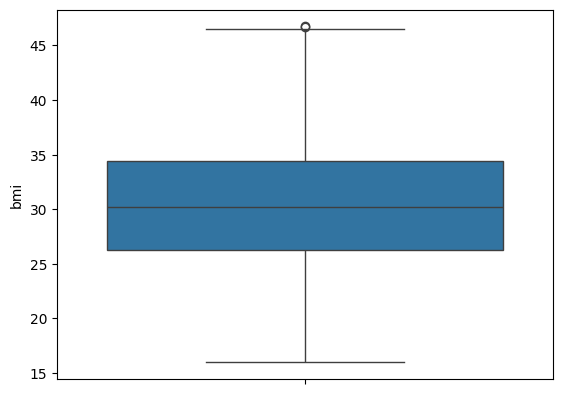

In [64]:
sns.boxplot(df.bmi)

In [65]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Encoding Techniques

### 1.Label Encoding

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [81]:
df.sex = le.fit_transform(df.sex)
df.smoker = le.fit_transform(df.smoker)

In [82]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


## One Hot Encoding

In [69]:
df1 = pd.get_dummies(df,columns = ['region'])
df1.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [70]:
df1.shape

(1338, 10)

In [71]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [83]:
df.region = le.fit_transform(df.region)

In [84]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [74]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.114259,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.039625,0.017163,0.076185,0.004588,0.057292
bmi,0.114259,0.039625,1.000000,0.017435,-0.003052,0.155342,0.190312
children,0.042469,0.017163,0.017435,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,-0.003052,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.155342,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.190312,0.067998,0.787251,-0.006208,1.000000


<Axes: >

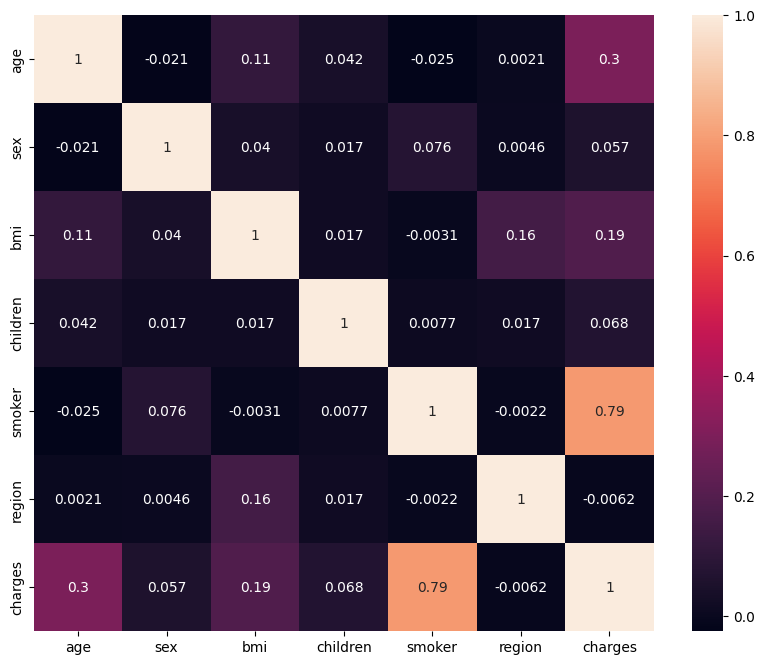

In [75]:
plt.figure(figsize= (10,8))
sns.heatmap(df.corr(),annot = True)

In [76]:
df.corr().charges.sort_values(ascending =False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.190312
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

In [77]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## X and y split, independent variable and dependent variable

In [85]:
X = df.drop(columns = ['charges'],axis  =1)
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [86]:
y =df.charges

In [87]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [88]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


## Scaling

### Minmax scaler

In [89]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [90]:
X_scaled = pd.DataFrame(scale.fit_transform(X), columns = X.columns)
X_scaled.head()

,age,sex,bmi,children,smoker,region
0,0.021739,0.0,0.321227,0.0,1.0,1.000000
1,0.000000,1.0,0.479150,0.2,0.0,0.666667
2,0.217391,1.0,0.458434,0.6,0.0,0.666667
3,0.326087,1.0,0.181464,0.0,0.0,0.333333
4,0.304348,1.0,0.347592,0.0,0.0,0.333333


In [91]:
df.shape

(1338, 7)

## Train Test Split

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.3,random_state= 42)

In [98]:
X_train.shape

(936, 6)

In [99]:
X_test.shape

(402, 6)

In [100]:
X_train.head()

,age,sex,bmi,children,smoker,region
332,0.934783,0.0,0.408932,0.0,0.0,0.333333
355,0.608696,1.0,0.313156,0.0,0.0,1.000000
138,0.782609,0.0,0.428840,0.6,0.0,0.666667
381,0.804348,1.0,0.396153,0.0,1.0,0.000000
292,0.152174,1.0,0.795803,0.4,1.0,0.666667
